In [1]:
# Потсроение аддитоивной модели временного ряда 

In [30]:
import numpy as np
import pandas as pd
from sklearn import linear_model
data=np.array([6.0,4.4,5.0,9.0,7.2,4.8,6.0,10.0,8.0,5.6,6.4,11.0,9.0,6.6,7.0,10.8],float)
print('Потребление электроэнергии:{}'.format(data))
cvartal=[]
for i in range(len(data)-3):
    four_cvartal=0
    for j in range(i,i+4):
        four_cvartal+=data[j]
    cvartal=np.append(cvartal,four_cvartal)
print('итого за 4 квартала:{}'.format(cvartal))

rolling_mean=np.zeros(len(cvartal),float)
for i in range(len(cvartal)):
    rolling_mean[i]=cvartal[i]/4
print('скользящая средняя:{}'.format(rolling_mean))

center_mean=np.zeros(len(rolling_mean)-1)
for i in range(1,len(rolling_mean)):
    center_mean[i-1]=(rolling_mean[i]+rolling_mean[i-1])/2
print('центрированная средняя:{}'.format(center_mean))

estimate=np.zeros(len(center_mean))
for i in range(len(center_mean)):
    estimate[i]=data[i+2]-center_mean[i]
print('оценкая сез компоненты:{}'.format(estimate))

Потребление электроэнергии:[ 6.   4.4  5.   9.   7.2  4.8  6.  10.   8.   5.6  6.4 11.   9.   6.6
  7.  10.8]
итого за 4 квартала:[24.4 25.6 26.  27.  28.  28.8 29.6 30.  31.  32.  33.  33.6 33.4]
скользящая средняя:[6.1  6.4  6.5  6.75 7.   7.2  7.4  7.5  7.75 8.   8.25 8.4  8.35]
центрированная средняя:[6.25  6.45  6.625 6.875 7.1   7.3   7.45  7.625 7.875 8.125 8.325 8.375]
оценкая сез компоненты:[-1.25   2.55   0.575 -2.075 -1.1    2.7    0.55  -2.025 -1.475  2.875
  0.675 -1.775]


In [31]:
cvartal_pokazatel=np.zeros(4,float)
cvartal_pokazatel_mean=np.zeros(4,float)
cvartal_pokazatel_correct=np.zeros(4,float)
coef_correct=0.0
for i in range(len(estimate)):
    if((i==2) | (i==6) | (i==10)):
        cvartal_pokazatel[0]+=estimate[i]
        cvartal_pokazatel_mean[0]=cvartal_pokazatel[0]/3
    elif((i==3) | (i==7) | (i==11)):
        cvartal_pokazatel[1]+=estimate[i]
        cvartal_pokazatel_mean[1]=cvartal_pokazatel[1]/3
    elif((i==0) |(i==4)| (i==8)):
        cvartal_pokazatel[2]+=estimate[i]
        cvartal_pokazatel_mean[2]=cvartal_pokazatel[2]/3
    elif((i==1) | (i==5) | (i==9)):
        cvartal_pokazatel[3]+=estimate[i]
        cvartal_pokazatel_mean[3]=cvartal_pokazatel[3]/3    
coef_correct=(cvartal_pokazatel_mean[0]+ cvartal_pokazatel_mean[1]+cvartal_pokazatel_mean[2]+cvartal_pokazatel_mean[3])/4
cvartal_pokazatel_correct[0]=cvartal_pokazatel_mean[0]-coef_correct
cvartal_pokazatel_correct[1]=cvartal_pokazatel_mean[1]-coef_correct
cvartal_pokazatel_correct[2]=cvartal_pokazatel_mean[2]-coef_correct
cvartal_pokazatel_correct[3]=cvartal_pokazatel_mean[3]-coef_correct
    
print('итого за i-ый квартал (за все годы):{}'.format(cvartal_pokazatel))
print('среднее за i-ый квартал (за все годы):{}'.format(cvartal_pokazatel_mean))
print('скоректированная за i-ый квартал (за все годы):{}'.format(cvartal_pokazatel_correct))
print('проверим сумму на рав-во 0 =',sum(cvartal_pokazatel_correct))

итого за i-ый квартал (за все годы):[ 1.8   -5.875 -3.825  8.125]
среднее за i-ый квартал (за все годы):[ 0.6        -1.95833333 -1.275       2.70833333]
скоректированная за i-ый квартал (за все годы):[ 0.58125    -1.97708333 -1.29375     2.68958333]
проверим сумму на рав-во 0 = 0.0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
a = cvartal_pokazatel_correct.reshape((1, -1)) 
from numpy.lib.stride_tricks import as_strided 
N, M = 4,1 
H, W = a.shape 
Si = as_strided(a, (H, N, W, M), (a.strides[0], 0, a.strides[1], 0)).reshape((H*N, W*M)).ravel()
df = pd.DataFrame({'Yt':data,'Si':Si})
df['T+E']=data-Si
df['T']=[5.715 + i*0.186 for i in range(1,17)]
df['T+S']=Si+df['T']
df['E']=data-df['T+S']
df['E^2']=df.E**2
print(df)

      Yt        Si       T+E      T        T+S         E       E^2
0    6.0  0.581250  5.418750  5.901   6.482250 -0.482250  0.232565
1    4.4 -1.977083  6.377083  6.087   4.109917  0.290083  0.084148
2    5.0 -1.293750  6.293750  6.273   4.979250  0.020750  0.000431
3    9.0  2.689583  6.310417  6.459   9.148583 -0.148583  0.022077
4    7.2  0.581250  6.618750  6.645   7.226250 -0.026250  0.000689
5    4.8 -1.977083  6.777083  6.831   4.853917 -0.053917  0.002907
6    6.0 -1.293750  7.293750  7.017   5.723250  0.276750  0.076591
7   10.0  2.689583  7.310417  7.203   9.892583  0.107417  0.011538
8    8.0  0.581250  7.418750  7.389   7.970250  0.029750  0.000885
9    5.6 -1.977083  7.577083  7.575   5.597917  0.002083  0.000004
10   6.4 -1.293750  7.693750  7.761   6.467250 -0.067250  0.004523
11  11.0  2.689583  8.310417  7.947  10.636583  0.363417  0.132072
12   9.0  0.581250  8.418750  8.133   8.714250  0.285750  0.081653
13   6.6 -1.977083  8.577083  8.319   6.341917  0.258083  0.06

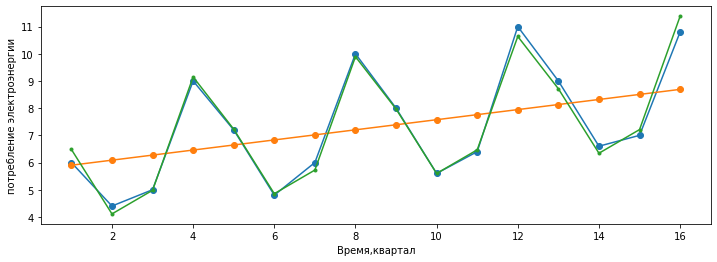

In [5]:
fig,ax=plt.subplots(figsize=(12,4))
plt.axes(xlabel='Время,квартал',ylabel='потребление электроэнергии')
plt.plot(range(1,17),df.Yt,marker='o')
plt.plot(range(1,17),df['T'],marker='o')
plt.plot(range(1,17),df['T+S'],marker='.')

In [6]:
# Прогнозирование по аддитивной модели
t17=5.715 + 17*0.186
t18=5.715 + 18*0.186
F17=Si[0]+t17
F18=Si[1]+t18
print('прогноз объема потребления за 1 полугодие:',F17+F18)

прогноз объема потребления за 1 полугодие: 16.544166666666666


In [7]:
#Построение мультипликативной модели

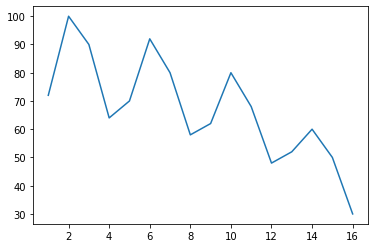

In [33]:
years=range(1,5)
cvartals=range(1,5)
table = pd.DataFrame(index=years,columns=cvartals)
table[1]=[72,70,62,52]
table[2]=[100,92,80,60]
table[3]=[90,80,68,50]
table[4]=[64,58,48,30]
plt.plot(range(1,17),table.to_numpy().ravel())


In [34]:
data=table.to_numpy().ravel()
print('Потребление электроэнергии:{}'.format(data))
cvartal=[]
for i in range(len(data)-3):
    four_cvartal=0
    for j in range(i,i+4):
        four_cvartal+=data[j]
    cvartal=np.append(cvartal,four_cvartal)
print('итого за 4 квартала:{}'.format(cvartal))

rolling_mean=np.zeros(len(cvartal),float)
for i in range(len(cvartal)):
    rolling_mean[i]=cvartal[i]/4
print('скользящая средняя:{}'.format(rolling_mean))

center_mean=np.zeros(len(rolling_mean)-1)
for i in range(1,len(rolling_mean)):
    center_mean[i-1]=(rolling_mean[i]+rolling_mean[i-1])/2
print('центрированная средняя:{}'.format(center_mean))

estimate=np.zeros(len(center_mean))
for i in range(len(center_mean)):
    estimate[i]=data[i+2]/center_mean[i]
print('оценкая сез. компоненты:{}'.format(estimate))

Потребление электроэнергии:[ 72 100  90  64  70  92  80  58  62  80  68  48  52  60  50  30]
итого за 4 квартала:[326. 324. 316. 306. 300. 292. 280. 268. 258. 248. 228. 210. 192.]
скользящая средняя:[81.5 81.  79.  76.5 75.  73.  70.  67.  64.5 62.  57.  52.5 48. ]
центрированная средняя:[81.25 80.   77.75 75.75 74.   71.5  68.5  65.75 63.25 59.5  54.75 50.25]
оценкая сез. компоненты:[1.10769231 0.8        0.90032154 1.21452145 1.08108108 0.81118881
 0.90510949 1.21673004 1.07509881 0.80672269 0.94977169 1.19402985]


In [35]:
cvartal_pokazatel=np.zeros(4,float)
cvartal_pokazatel_mean=np.zeros(4,float)
cvartal_pokazatel_correct=np.zeros(4,float)
coef_correct=0.0
for i in range(len(estimate)):
    if((i==2) | (i==6) | (i==10)):
        cvartal_pokazatel[0]+=estimate[i]
        cvartal_pokazatel_mean[0]=cvartal_pokazatel[0]/3
    elif((i==3) | (i==7) | (i==11)):
        cvartal_pokazatel[1]+=estimate[i]
        cvartal_pokazatel_mean[1]=cvartal_pokazatel[1]/3
    elif((i==0) |(i==4)| (i==8)):
        cvartal_pokazatel[2]+=estimate[i]
        cvartal_pokazatel_mean[2]=cvartal_pokazatel[2]/3
    elif((i==1) | (i==5) | (i==9)):
        cvartal_pokazatel[3]+=estimate[i]
        cvartal_pokazatel_mean[3]=cvartal_pokazatel[3]/3    
coef_correct=4.0 / (sum(cvartal_pokazatel_mean))
cvartal_pokazatel_correct[0]=cvartal_pokazatel_mean[0]*coef_correct
cvartal_pokazatel_correct[1]=cvartal_pokazatel_mean[1]*coef_correct
cvartal_pokazatel_correct[2]=cvartal_pokazatel_mean[2]*coef_correct
cvartal_pokazatel_correct[3]=cvartal_pokazatel_mean[3]*coef_correct
    
print('итого за i-ый квартал (за все годы):{}'.format(cvartal_pokazatel))
print('среднее за i-ый квартал (за все годы):{}'.format(cvartal_pokazatel_mean))
print('скоректированная за i-ый квартал (за все годы):{}'.format(cvartal_pokazatel_correct))
print('проверим сумму на рав-во 4 =',sum(cvartal_pokazatel_correct))

итого за i-ый квартал (за все годы):[2.75520272 3.62528134 3.2638722  2.4179115 ]
среднее за i-ый квартал (за все годы):[0.91840091 1.20842711 1.0879574  0.8059705 ]
скоректированная за i-ый квартал (за все годы):[0.91365994 1.20218898 1.08234115 0.80180992]
проверим сумму на рав-во 4 = 4.0


In [36]:
a = cvartal_pokazatel_correct.reshape((1, -1)) 
from numpy.lib.stride_tricks import as_strided 
N, M = 4,1 
H, W = a.shape 
Si = as_strided(a, (H, N, W, M), (a.strides[0], 0, a.strides[1], 0)).reshape((H*N, W*M)).ravel()
df = pd.DataFrame({'Yt':data,'Si':Si})
df['T*E']=data/Si
df['T']=[90.59 - i*2.773 for i in range(1,17)]
df['T*S']=Si*df['T']
df['E']=data-df['T*S']
df['E^2']=df.E**2
print(df)

     Yt        Si        T*E       T         T*S         E        E^2
0    72  0.913660  78.803936  87.817   80.234875 -8.234875  67.813171
1   100  1.202189  83.181598  85.044  102.238959 -2.238959   5.012940
2    90  1.082341  83.153079  82.271   89.045289  0.954711   0.911473
3    64  0.801810  79.819416  79.498   63.742285  0.257715   0.066417
4    70  0.913660  76.614938  76.725   70.100559 -0.100559   0.010112
5    92  1.202189  76.527070  73.952   88.904279  3.095721   9.583486
6    80  1.082341  73.913848  71.179   77.039961  2.960039   8.761831
7    58  0.801810  72.336346  68.406   54.848610  3.151390   9.931261
8    62  0.913660  67.858945  65.633   59.966243  2.033757   4.136167
9    80  1.202189  66.545278  62.860   75.569599  4.430401  19.628451
10   68  1.082341  62.826771  60.087   65.034633  2.965367   8.793402
11   48  0.801810  59.864562  57.314   45.954934  2.045066   4.182295
12   52  0.913660  56.913954  54.541   49.831927  2.168073   4.700541
13   60  1.202189  4

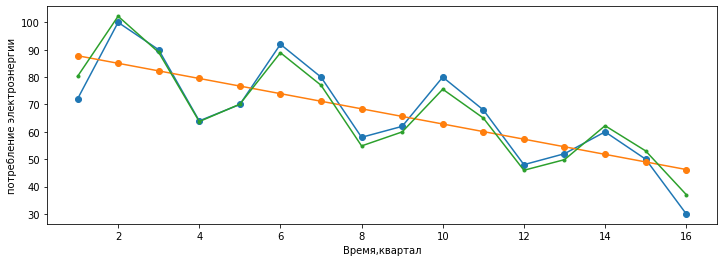

In [12]:
fig,ax=plt.subplots(figsize=(12,4))
plt.axes(xlabel='Время,квартал',ylabel='потребление электроэнергии')
plt.plot(range(1,17),df.Yt,marker='o')
plt.plot(range(1,17),df['T'],marker='o')
plt.plot(range(1,17),df['T*S'],marker='.')

In [13]:
# Прогнозирование по мультиплтикативной модели
t17=90.59 -2.773*17
t18=90.59 -2.773*18
F17=Si[0]*t17
F18=Si[1]*t18
print('прогноз объема потребления за 1 полугодие {}$:'.format(F17+F18))

прогноз объема потребления за 1 полугодие 88.5978497805728$:


In [14]:
#Применение фиктивных переменных для моделирования сезонных колебаний

In [29]:
# уравнение регрессии имеет вид 
x1 = np.zeros(16)
x2 = np.zeros(16)
x3 = np.zeros(16)
y=np.array([6.,4.4,5.,9.,7.2,4.8,6.,10.,8.0,5.6,6.4,11.,9.,6.6,7.,10.8],float)
reg = linear_model.LinearRegression()
for i in  range(1,17):
    if((i==1)|(i==5)|(i==9)|(i==13)): 
        x1[i]=1 
    elif ((i==2)|(i==6)|(i==10)|(i==14)):
        x2[i]=1
    elif ((i==3)|(i==7)|(i==11)|(i==15)):
        x3[i]=1
t = np.array(range(1,17),int)
dt = np.column_stack((t,x1,x2,x3))
reg.fit(dt, y)
R2 = reg.score(dt,y)
#Уравнение регрессии имеет вид: y = 8.32 + 0.18 * t - 2.08 * x1 - 4.47 * x2 - 3.91 * x3
C_com = y.var() * y.size
C_ost = (1-R2) * C_com
C_ost
#1.010000000000004
#1.01<1.10 => модель с фиктивными переменными лучше чем аддитивная модель

1.010000000000004